.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [229]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')


# Problem definition

# preparing data

In [230]:
city_temp=pd.read_csv("../data/raw/temperature.csv", parse_dates=['datetime'])
city_humid=pd.read_csv("../data/raw/humidity.csv",parse_dates=['datetime'])
city_press=pd.read_csv("../data/raw/pressure.csv",parse_dates=['datetime'])
city_speed=pd.read_csv("../data/raw/wind_speed.csv",parse_dates=['datetime'])
city_dir=pd.read_csv("../data/raw/wind_direction.csv",parse_dates=['datetime'])
city_taxi=pd.read_csv("../data/raw/taxi-NYC.csv",parse_dates=['datetime'])
city_temp.sample(5)

datetime  Vancouver    Portland  San Francisco  Seattle  \
2124  2012-12-29 00:00:00     277.12  279.310000     284.740000  278.780   
12137 2014-02-19 05:00:00     277.52  278.560000     285.980000  277.330   
28852 2016-01-16 16:00:00     278.16  281.030000     284.120000  279.280   
17552 2014-10-02 20:00:00     288.07  289.685333     296.585333  288.452   
37615 2017-01-15 19:00:00     273.84  269.130000     281.200000  273.980   

       Los Angeles   San Diego  Las Vegas  Phoenix  Albuquerque     ...      \
2124    287.660000  286.330000    283.030  285.060   272.880000     ...       
12137   286.450000  286.230000    287.860  291.950   282.090000     ...       
28852   284.240000  283.910000    277.140  279.890   273.630000     ...       
17552   300.018667  302.318667    296.952  301.202   290.518667     ...       
37615   287.210000  287.810000    283.480  286.300   276.750000     ...       

       Philadelphia  New York  Montreal   Boston  Beersheba  \
2124        274.540    273.61    269.18  272.890    284.260   
12137       270.480    269.57    266.40  270.060    281.304   
28852       282.480    280.22    268.94  275.490    282.175   
17552       294.502    293.20    292.78  287.452    292.217   
37615       276.090    275.92    264.82  275.280    280.949   

       Tel Aviv District   Eilat    Haifa  Nahariyya   Jerusalem  
2124              283.15  285.15  287.850    287.850  284.200000  
12137             283.11  286.15  286.154    282.354  281.150000  
28852             289.51  293.66  288.150    288.150  289.470000  
17552             297.57  301.69  297.329    289.579  291.085333  
37615             286.83  290.17  286.150    286.150  287.000000  

[5 rows x 37 columns]

For each city we have timeseries in a column. We are going to chose New York as our chosen city and  our chosen features. 

In [231]:
data=city_temp[['datetime','New York']]
data=data.rename(columns={'New York':'temperature'})
data.head(5)
sample = data[:168]

In [232]:
data_humid=city_humid[['datetime','New York']]
data_humid=data_humid.rename(columns={'New York':'humidity'})


In [233]:
city_press.sample(5)

datetime  Vancouver  Portland  San Francisco  Seattle  \
28410 2015-12-29 06:00:00     1021.0    1021.0         1018.0   1022.0   
22867 2015-05-12 07:00:00     1021.0    1027.0         1025.0   1026.0   
17069 2014-09-12 17:00:00     1020.0    1028.0         1024.0   1030.0   
42549 2017-08-09 09:00:00     1014.0    1013.0         1014.0   1013.0   
10356 2013-12-07 00:00:00     1024.0    1015.0         1019.0   1039.0   

       Los Angeles  San Diego  Las Vegas  Phoenix  Albuquerque    ...      \
28410       1011.0     1011.0     1009.0   1008.0       1010.0    ...       
22867       1023.0     1024.0     1019.0   1021.0       1030.0    ...       
17069       1023.0     1023.0     1025.0   1022.0       1031.0    ...       
42549       1012.0     1013.0     1011.0   1011.0       1022.0    ...       
10356       1018.0     1019.0     1021.0   1012.0       1025.0    ...       

       Philadelphia  New York  Montreal  Boston  Beersheba  Tel Aviv District  \
28410        1025.0    1030.0    1037.0  1036.0      989.0             1015.0   
22867        1027.0    1013.0    1016.0  1028.0      990.0             1017.0   
17069        1033.0    1020.0       NaN  1032.0      990.0             1014.0   
42549        1021.0    1021.0    1016.0  1019.0      982.0             1009.0   
10356        1019.0    1018.0    1017.0  1016.0      998.0             1017.0   

        Eilat   Haifa  Nahariyya  Jerusalem  
28410  1017.0  1021.0     1021.0     1016.0  
22867   957.0  1017.0      990.0     1025.0  
17069   956.0  1018.0      991.0     1025.0  
42549  1008.0  1010.0     1010.0     1009.0  
10356  1018.0  1024.0     1023.0     1000.0  

[5 rows x 37 columns]

In [234]:
data_press=city_press[['datetime','New York']]
data_press=data_press.rename(columns={'New York':'pressure'})
data_press.head(5)

datetime  pressure
0 2012-10-01 12:00:00       NaN
1 2012-10-01 13:00:00    1012.0
2 2012-10-01 14:00:00    1012.0
3 2012-10-01 15:00:00    1012.0
4 2012-10-01 16:00:00    1012.0

In [235]:
data_speed=city_speed[['datetime','New York']]
data_speed=data_speed.rename(columns={'New York':'wind_speed'})
data_speed.head(5)

datetime  wind_speed
0 2012-10-01 12:00:00         NaN
1 2012-10-01 13:00:00         7.0
2 2012-10-01 14:00:00         7.0
3 2012-10-01 15:00:00         7.0
4 2012-10-01 16:00:00         7.0

In [236]:
data_dir=city_dir[['datetime','New York']]
data_dir=data_dir.rename(columns={'New York':'wind_direction'})
data_dir.head(5)

datetime  wind_direction
0 2012-10-01 12:00:00             NaN
1 2012-10-01 13:00:00           260.0
2 2012-10-01 14:00:00           260.0
3 2012-10-01 15:00:00           260.0
4 2012-10-01 16:00:00           260.0

In [237]:
data = data.fillna(method = 'bfill', axis=0).dropna()
data_press = data_press.fillna(method = 'bfill', axis=0).dropna()
data_humid = data_humid.fillna(method = 'bfill', axis=0).dropna()
data_dir = data_dir.fillna(method = 'bfill', axis=0).dropna()
data_speed = data_speed.fillna(method = 'bfill', axis=0).dropna()

we have some missing value. All features's tend to be constant from one hour to the next, so we can use backfill to replace any missing values and drop the rest.There is no missing value and there is no outlayer so our data looks good.

In [238]:
total_data=pd.concat([data,data_humid['humidity'],data_press['pressure'],data_speed['wind_speed'],data_dir['wind_direction'],city_taxi['rides']], axis=1)


In [239]:
total_data.head(5)

datetime  temperature  humidity  pressure  wind_speed  \
0 2012-10-01 12:00:00   288.220000      58.0    1012.0         7.0   
1 2012-10-01 13:00:00   288.220000      58.0    1012.0         7.0   
2 2012-10-01 14:00:00   288.247676      57.0    1012.0         7.0   
3 2012-10-01 15:00:00   288.326940      57.0    1012.0         7.0   
4 2012-10-01 16:00:00   288.406203      57.0    1012.0         7.0   

   wind_direction  rides  
0           260.0     31  
1           260.0     31  
2           260.0     30  
3           260.0     30  
4           260.0     30

It is time to concatenate our data and create your processed database.

In [240]:
total_data['date']=total_data.datetime.dt.date

In [241]:
total_data['hour']=total_data.datetime.dt.hour

In [242]:
total_data['month']=total_data.datetime.dt.month

In [243]:
total_data['day']=total_data.datetime.dt.day

In [244]:
total_data['year']=total_data.datetime.dt.year

In [245]:
total_data.head(5)

datetime  temperature  humidity  pressure  wind_speed  \
0 2012-10-01 12:00:00   288.220000      58.0    1012.0         7.0   
1 2012-10-01 13:00:00   288.220000      58.0    1012.0         7.0   
2 2012-10-01 14:00:00   288.247676      57.0    1012.0         7.0   
3 2012-10-01 15:00:00   288.326940      57.0    1012.0         7.0   
4 2012-10-01 16:00:00   288.406203      57.0    1012.0         7.0   

   wind_direction  rides        date  hour  month  day  year  
0           260.0     31  2012-10-01    12     10    1  2012  
1           260.0     31  2012-10-01    13     10    1  2012  
2           260.0     30  2012-10-01    14     10    1  2012  
3           260.0     30  2012-10-01    15     10    1  2012  
4           260.0     30  2012-10-01    16     10    1  2012

It is better to separate date from datetime.

In [246]:
data.to_csv("../data/Processed/New York_Weather_cyclical_taxi.csv.gz")

# feature engineering

In [247]:
total_data['temperature']=total_data['temperature']-273.15

It is better to convert the temperature to Celsius.

In [248]:
total_data.head(5)

datetime  temperature  humidity  pressure  wind_speed  \
0 2012-10-01 12:00:00    15.070000      58.0    1012.0         7.0   
1 2012-10-01 13:00:00    15.070000      58.0    1012.0         7.0   
2 2012-10-01 14:00:00    15.097676      57.0    1012.0         7.0   
3 2012-10-01 15:00:00    15.176940      57.0    1012.0         7.0   
4 2012-10-01 16:00:00    15.256203      57.0    1012.0         7.0   

   wind_direction  rides        date  hour  month  day  year  
0           260.0     31  2012-10-01    12     10    1  2012  
1           260.0     31  2012-10-01    13     10    1  2012  
2           260.0     30  2012-10-01    14     10    1  2012  
3           260.0     30  2012-10-01    15     10    1  2012  
4           260.0     30  2012-10-01    16     10    1  2012

In [249]:
print(total_data.temperature.describe())
plot = sns.distplot(total_data.temperature)

count    44461.000000
mean        12.250469
std         10.220826
min        -22.376000
25%          4.220000
50%         12.720000
75%         20.610000
max         37.090000
Name: temperature, dtype: float64


count    44461.000000
mean        66.516790
std         19.884897
min         10.000000
25%         51.000000
50%         68.000000
75%         83.000000
max        100.000000
Name: humidity, dtype: float64


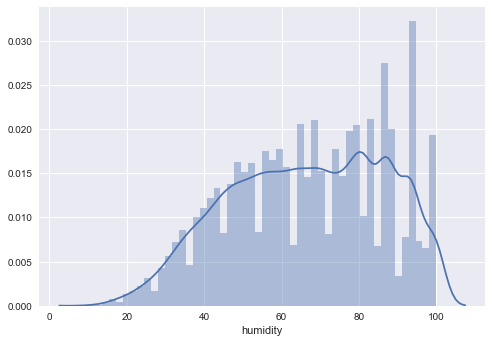

In [250]:
print(total_data.humidity.describe())
plot = sns.distplot(total_data.humidity)

count    44461.000000
mean      1017.021142
std         10.113110
min        959.000000
25%       1012.000000
50%       1017.000000
75%       1023.000000
max       1052.000000
Name: pressure, dtype: float64


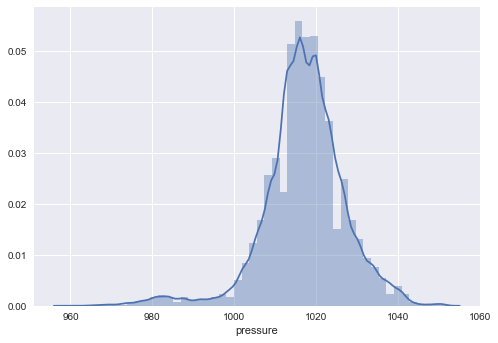

In [251]:
print(total_data.pressure.describe())
plot = sns.distplot(total_data.pressure)

count    44461.000000
mean         3.211039
std          2.189765
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         25.000000
Name: wind_speed, dtype: float64


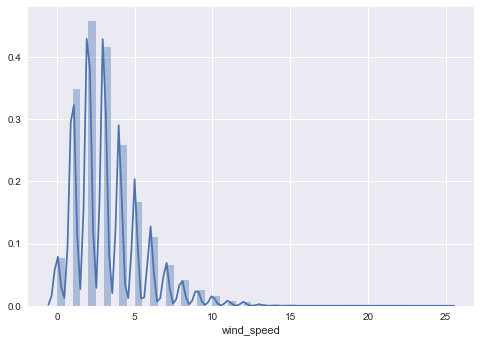

In [252]:
print(total_data.wind_speed.describe())
plot = sns.distplot(total_data.wind_speed)

In [253]:
print(total_data.wind_direction.describe())
plot = sns.distplot(total_data.wind_direction)

count    44461.000000
mean       196.251681
std        107.432893
min          0.000000
25%        104.000000
50%        220.000000
75%        289.000000
max        360.000000
Name: wind_direction, dtype: float64


Normal distribution looks good

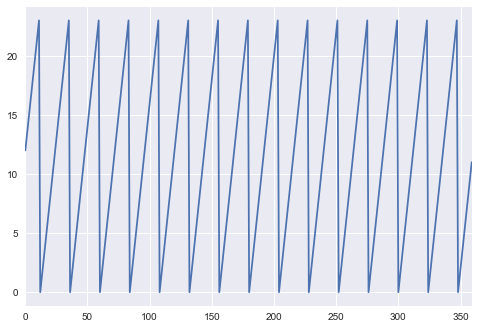

In [256]:
#We are going to extract the hours from the datetime
total_data['hour']=total_data.datetime.dt.hour
# chose a sample aproximatly 15 days
sample=total_data[:360]
sample['hour'].plot()

In this sample we need to see a cycle betwwn 0 and 23 that repeat 15 times. when the time goes from 23 to 0 we have a jump, so there is a problem about presenting syclical data to machine learning algorithem. we chose one day to have a look at the time arounf midnight

between record "20387" and 35 : 23-22=1
between record "20388" and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

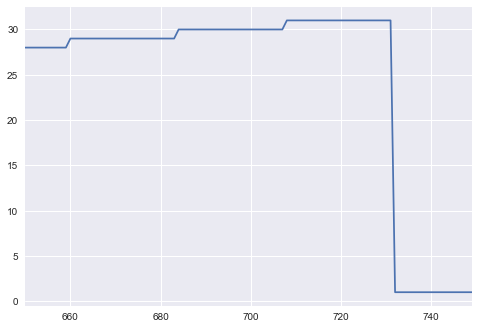

In [257]:
total_data['day']=total_data.datetime.dt.day
sample=total_data[650:750]
sample['day'].plot()

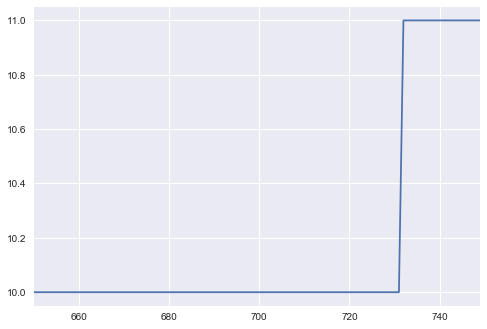

In [258]:
total_data['month']=total_data.datetime.dt.month
sample=total_data[650:750]
sample['month'].plot()


# cyclical transformation 

In [259]:
def cyclical(dataset,column,max_v):
    dataset[column+'_sin']=np.sin(2*np.pi*dataset[column]/max_v)
    dataset[column+'_cos']=np.cos(2*np.pi*dataset[column]/max_v)
    return dataset


In [260]:
total_data.head(5)

datetime  temperature  humidity  pressure  wind_speed  \
0 2012-10-01 12:00:00    15.070000      58.0    1012.0         7.0   
1 2012-10-01 13:00:00    15.070000      58.0    1012.0         7.0   
2 2012-10-01 14:00:00    15.097676      57.0    1012.0         7.0   
3 2012-10-01 15:00:00    15.176940      57.0    1012.0         7.0   
4 2012-10-01 16:00:00    15.256203      57.0    1012.0         7.0   

   wind_direction  rides        date  hour  month  day  year  
0           260.0     31  2012-10-01    12     10    1  2012  
1           260.0     31  2012-10-01    13     10    1  2012  
2           260.0     30  2012-10-01    14     10    1  2012  
3           260.0     30  2012-10-01    15     10    1  2012  
4           260.0     30  2012-10-01    16     10    1  2012

between record 34 and 35 : 23-22=1
between record 35 and 36 : 0-23=-23
so we need to change the encoding of the feature. A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [261]:
total_data= cyclical(total_data,'hour',23.0)
total_data= cyclical(total_data,'day',365.0)
total_data= cyclical(total_data,'month',12.0)

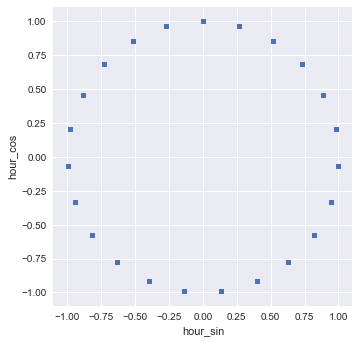

In [262]:
total_data.head(5)
total_data.plot.scatter('hour_sin','hour_cos').set_aspect('equal')

now, it is prefect to present as a cyclical feature for machine learning algorithms.

In [263]:
#data_city=branch[branch.cit'y=='london'] 
total_data=total_data[total_data.year==2015]

In [264]:
total_data[33:52]

datetime  temperature  humidity  pressure  wind_speed  \
19749 2015-01-02 09:00:00    -0.745000      62.0    1016.0         3.0   
19750 2015-01-02 10:00:00    -0.745000      62.0    1016.0         3.0   
19751 2015-01-02 11:00:00    -0.284075      69.0    1023.0         3.0   
19752 2015-01-02 12:00:00    -1.355000      62.0    1019.0         3.0   
19753 2015-01-02 13:00:00    -0.646455      65.0    1022.0         3.0   
19754 2015-01-02 14:00:00     0.826273      71.0    1029.0         3.0   
19755 2015-01-02 15:00:00     1.081247      67.0    1026.0         3.0   
19756 2015-01-02 16:00:00     2.875000      76.0    1036.0         4.0   
19757 2015-01-02 17:00:00     3.451000      75.0    1036.0         4.0   
19758 2015-01-02 18:00:00     3.777000      57.0    1021.0         3.0   
19759 2015-01-02 19:00:00     3.087000      56.0    1023.0         3.0   
19760 2015-01-02 20:00:00     3.087000      56.0    1023.0         3.0   
19761 2015-01-02 21:00:00     3.087000      56.0    1023.0         3.0   
19762 2015-01-02 22:00:00     3.087000      56.0    1023.0         3.0   
19763 2015-01-02 23:00:00     2.331569      65.0    1029.0         3.0   
19764 2015-01-03 00:00:00    -0.567000      62.0    1025.0         2.0   
19765 2015-01-03 01:00:00    -0.567000      62.0    1025.0         2.0   
19766 2015-01-03 02:00:00    -3.508000      70.0    1028.0         1.0   
19767 2015-01-03 03:00:00    -3.508000      70.0    1028.0         1.0   

       wind_direction  rides        date  hour  month  day  year  \
19749           261.0     41  2015-01-02     9      1    2  2015   
19750           261.0     41  2015-01-02    10      1    2  2015   
19751           258.0     42  2015-01-02    11      1    2  2015   
19752           254.0     41  2015-01-02    12      1    2  2015   
19753           254.0     41  2015-01-02    13      1    2  2015   
19754           255.0     42  2015-01-02    14      1    2  2015   
19755           259.0     41  2015-01-02    15      1    2  2015   
19756           259.0     41  2015-01-02    16      1    2  2015   
19757           263.0     40  2015-01-02    17      1    2  2015   
19758           270.0     38  2015-01-02    18      1    2  2015   
19759           271.0     37  2015-01-02    19      1    2  2015   
19760           271.0     37  2015-01-02    20      1    2  2015   
19761           271.0     37  2015-01-02    21      1    2  2015   
19762           271.0     37  2015-01-02    22      1    2  2015   
19763           267.0     38  2015-01-02    23      1    2  2015   
19764           266.0     43  2015-01-03     0      1    3  2015   
19765           266.0     43  2015-01-03     1      1    3  2015   
19766           264.0     46  2015-01-03     2      1    3  2015   
19767           264.0     46  2015-01-03     3      1    3  2015   

           hour_sin  hour_cos   day_sin   day_cos  month_sin  month_cos  
19749  6.310879e-01 -0.775711  0.034422  0.999407        0.5   0.866025  
19750  3.984011e-01 -0.917211  0.034422  0.999407        0.5   0.866025  
19751  1.361666e-01 -0.990686  0.034422  0.999407        0.5   0.866025  
19752 -1.361666e-01 -0.990686  0.034422  0.999407        0.5   0.866025  
19753 -3.984011e-01 -0.917211  0.034422  0.999407        0.5   0.866025  
19754 -6.310879e-01 -0.775711  0.034422  0.999407        0.5   0.866025  
19755 -8.169699e-01 -0.576680  0.034422  0.999407        0.5   0.866025  
19756 -9.422609e-01 -0.334880  0.034422  0.999407        0.5   0.866025  
19757 -9.976688e-01 -0.068242  0.034422  0.999407        0.5   0.866025  
19758 -9.790841e-01  0.203456  0.034422  0.999407        0.5   0.866025  
19759 -8.878852e-01  0.460065  0.034422  0.999407        0.5   0.866025  
19760 -7.308360e-01  0.682553  0.034422  0.999407        0.5   0.866025  
19761 -5.195840e-01  0.854419  0.034422  0.999407        0.5   0.866025  
19762 -2.697968e-01  0.962917  0.034422  0.999407        0.5   0.866025  
19763 -2.449294e-16  1.000000  0.034422  0.999407        0.5   0.


# Visualization of the correlation between the features

In this notebook, I will learn how to perform k-means lustering using scikit-learn in Python.

I will use cluster analysis to generate a big picture model of the weather at a local station using a minute-graunlarity data. In this dataset, I have in the order of millions records. How do I create 12 clusters out of them?

In [265]:
sample=total_data[['hour','day','month','humidity','wind_speed','wind_direction','temperature','rides']]
corrmat = sample.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Obviously we see negative correlation between temperature and taxi rides. It confirms that we need to analyze them in depth.
There is not signeficant correlation between independent variable so we can use them as a predictor.

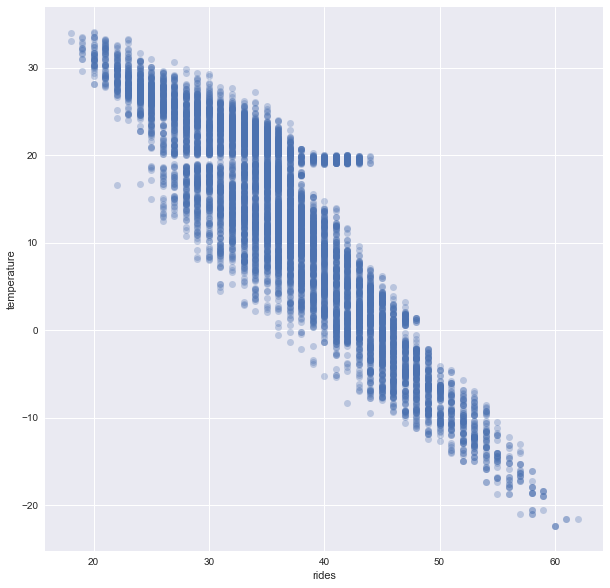

In [266]:


plt.figure(figsize=(10,10))
plt.ylabel('temperature')
plt.xlabel('rides')

plt.plot(total_data['rides'], total_data['temperature'], 'o', alpha=0.3)
plt.show()

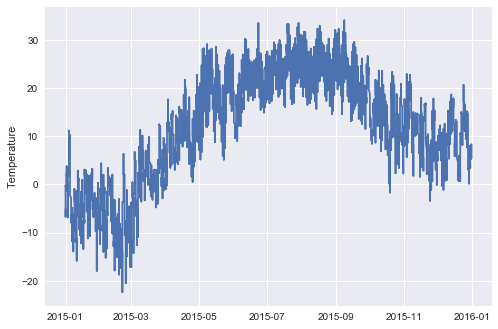

In [267]:

plt.plot(total_data.date, total_data.temperature)
plt.ylabel('Temperature');


In [268]:
plt.plot(total_data.date, total_data.rides,'r')
plt.ylabel('rides');
plt.show()

# feature engineering 

In [269]:
def get_encode_feature(total_data):
        return total_data[['day_cos','hour_cos','hour_sin','day_sin','month_sin','month_cos','temperature']]

In [270]:
def get_unencoded_feature(total_data):
    return total_data[['month', 'day', 'hour']]

Let's split our data into training and test sets.

In [271]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(total_data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)

In [272]:
X_train=get_encode_feature(data_train)
X_test=get_encode_feature(data_test)
y_train=data_train.rides
y_test=data_test.rides
threshold = 0.8
X_columns=['hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','temperature']
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print(X_columns)


X_train (5256, 7)
y_train (5256,)
X_test (1752, 7)
y_test (1752,)
['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'temperature']


# Model Training / Evaluation with encoded feature

In [273]:
# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


sns.set_style('whitegrid')

models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(20,60, 10), range(20,60, 10), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([20, 60])
    plt.ylim([20, 60])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

MODEL LinearRegression
MAE 2.18977401161
RMSE 2.80547703325


Feature Importance
             0         1
2      day_sin  2.211473
6  temperature -0.635014
4    month_sin -0.644042
3      day_cos -0.731733
1     hour_cos -0.756326

MODEL RandomForestRegressor10
MAE 1.45342465753
RMSE 1.94026665776


Feature Importance
             0         1
6  temperature  0.890832
2      day_sin  0.041790
1     hour_cos  0.016818
0     hour_sin  0.016303
3      day_cos  0.015180

MODEL RandomForestRegressor100
MAE 1.35721461187
RMSE 1.8127891991


Feature Importance
             0         1
6  temperature  0.890088
2      day_sin  0.042773
1     hour_cos  0.016388
3      day_cos  0.015787
0     hour_sin  0.015654



model       mae      rmse
2  RandomForestRegressor100  1.357215  1.812789
1   RandomForestRegressor10  1.453425  1.940267
0          LinearRegression  2.189774  2.805477

As we see RandomForestRegressor100  is the best model for this project

# Model Training / Evaluation with encoded feature

In [274]:
X_train=get_unencoded_feature(data_train)
X_test=get_unencoded_feature(data_test)
y_train=data_train.rides
y_test=data_test.rides
threshold = 0.8
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (5256, 3)
y_train (5256,)
X_test (1752, 3)
y_test (1752,)


In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [276]:
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 5.2111174369
RMSE 6.24582453315


I chose linear regression and try this with cyclical and non cyclical feature 
MODEL LinearRegression - cyclical feature
MAE 2.18977401161
RMSE 2.80547703325



MODEL LinearRegression - uncyclical feature
MAE 5.2111174369
RMSE 6.24582453315
We achieved an improvement of 52% in our MAE


In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

# k-Means Clustering 

I will try to perform k-means clustering using.

I will use cluster analysis to generate a big picture model of the weather and number of taxi rides in NYC. In this dataset.

# Select Features of Interest for Clustering 

In [278]:
features=['humidity','pressure','wind_speed','wind_direction','temperature','rides']

In [279]:
total_data.shape

(8760, 18)

In [280]:
total_data = total_data[features]

In [281]:
total_data.head()

humidity  pressure  wind_speed  wind_direction  temperature  rides
19716      59.0    1022.0         2.0           249.0       -5.100     46
19717      59.0    1022.0         2.0           249.0       -5.100     46
19718      58.0    1021.0         2.0           246.0       -5.964     46
19719      58.0    1021.0         2.0           246.0       -5.964     46
19720      58.0    1021.0         2.0           246.0       -5.964     46

In [282]:
total_data.columns

Index(['humidity', 'pressure', 'wind_speed', 'wind_direction', 'temperature',
       'rides'],
      dtype='object')

In [283]:
total_data.head()

humidity  pressure  wind_speed  wind_direction  temperature  rides
19716      59.0    1022.0         2.0           249.0       -5.100     46
19717      59.0    1022.0         2.0           249.0       -5.100     46
19718      58.0    1021.0         2.0           246.0       -5.964     46
19719      58.0    1021.0         2.0           246.0       -5.964     46
19720      58.0    1021.0         2.0           246.0       -5.964     46

Scale the Features using StandardScaler 

In [284]:
X = StandardScaler().fit_transform(total_data)
X

array([[-0.63191976,  0.21586309, -0.45144089,  0.45797614, -1.49667141,
         1.22183269],
       [-0.63191976,  0.21586309, -0.45144089,  0.45797614, -1.49667141,
         1.22183269],
       [-0.68649226,  0.10864146, -0.45144089,  0.42780799, -1.57321824,
         1.22183269],
       ..., 
       [-0.35905721, -0.32024507,  1.41336054,  1.04122701, -0.34697782,
        -0.22430431],
       [-0.52277474, -0.21302343,  1.41336054,  0.97083466, -0.4060563 ,
        -0.22430431],
       [ 0.13209538,  0.21586309,  0.79176006,  0.96077861, -0.49165311,
         0.03862969]])

In [ ]:
deploying K-means 

In [285]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


We achived to 12 cluster. Now the main question is that " What are the centers of 12 clusters ? "
we can do it simply using the predefined function. 

In [286]:
centers = model.cluster_centers_
centers

array([[-0.74224154,  0.2852248 , -0.3115389 , -1.31762133,  0.64113015,
        -0.78667124],
       [-0.79610774,  1.01804464, -0.07021302,  0.39375117, -0.06768164,
        -0.27433301],
       [ 0.75045152,  1.73080728, -0.53394423, -0.75087071, -0.87592738,
         0.93427851],
       [ 0.44643577, -0.93690415,  0.50516788,  0.15260575,  0.75176871,
        -0.40597982],
       [ 0.61504157,  0.76083921,  0.70646526,  1.04939282, -1.05121119,
         0.94728413],
       [ 0.2307187 ,  0.33493699,  1.67542346, -1.44876975,  0.03084359,
        -0.10230023],
       [ 0.86804261, -0.27738434, -0.48624405, -1.49424612, -0.25040607,
         0.51930591],
       [ 0.39183847, -1.31686472, -0.05838847,  0.63128555, -1.01242598,
         0.88134644],
       [-1.31398235, -0.40554338,  0.0131574 ,  0.47366496,  1.13500966,
        -1.39971417],
       [-1.1611607 , -0.61492054,  2.17293641,  0.78964168,  0.15345832,
        -0.72008833],
       [ 0.75565536, -0.21475408, -0.71230331,  0.

In [287]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [288]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [289]:
total_data.head()

humidity  pressure  wind_speed  wind_direction  temperature  rides
19716      59.0    1022.0         2.0           249.0       -5.100     46
19717      59.0    1022.0         2.0           249.0       -5.100     46
19718      58.0    1021.0         2.0           246.0       -5.964     46
19719      58.0    1021.0         2.0           246.0       -5.964     46
19720      58.0    1021.0         2.0           246.0       -5.964     46

In [290]:
P = pd_centers(features, centers)
P

humidity  pressure  wind_speed  wind_direction  temperature     rides  \
0  -0.742242  0.285225   -0.311539       -1.317621     0.641130 -0.786671   
1  -0.796108  1.018045   -0.070213        0.393751    -0.067682 -0.274333   
2   0.750452  1.730807   -0.533944       -0.750871    -0.875927  0.934279   
3   0.446436 -0.936904    0.505168        0.152606     0.751769 -0.405980   
4   0.615042  0.760839    0.706465        1.049393    -1.051211  0.947284   
5   0.230719  0.334937    1.675423       -1.448770     0.030844 -0.102300   
6   0.868043 -0.277384   -0.486244       -1.494246    -0.250406  0.519306   
7   0.391838 -1.316865   -0.058388        0.631286    -1.012426  0.881346   
8  -1.313982 -0.405543    0.013157        0.473665     1.135010 -1.399714   
9  -1.161161 -0.614921    2.172936        0.789642     0.153458 -0.720088   
10  0.755655 -0.214754   -0.712303        0.361850     0.433036  0.035254   
11  0.222539  0.166921   -0.617317        0.562110    -1.790927  1.702832   

    prediction  
0            0  
1            1  
2            2  
3            3  
4            4  
5            5  
6            6  
7            7  
8            8  
9            9  
10          10  
11          11

here we can plot a cold day.

In [314]:
parallel_plot(P[(P['humidity'] > 0.5) & (P['temperature'] < 0.5)])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


In [ ]:
we can plot a cold and windy day

In [315]:
parallel_plot(P[(P['wind_speed'] > 0.5) & (P['temperature'] < 0.5)])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  
